## Fundamentals of Data Analysis Tasks
#### Hayley Doherty
---

### Task 1: Counts
The aim of this task is to write a python function called counts that takes in a list as input and returns a dictionary of the unique items from the list as keys and the number of times each item appears in the list. 

The following code was obtained from Geeks for Geeks [1] with some alterations. It can be used to count the frequency of unique numbers strings in a list. The original code from Geeks for Geeks could only be used to count the frequency of distinct numbers in a list and did not return the output in the form of a dictionary. By not specifying that the output should be made up of integers (using %d as they did) my code is able to include strings in the input and the function successfully counts the frequency of both the numbers and strings.  



In [2]:
import numpy as np
rng = np.random.default_rng()
from collections import defaultdict
import matplotlib.pyplot as plt

In [1]:
my_list = [1, 2, 1, 3, 1, 2, 'a', 'b', 'a']

def counts(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    # for loop will iterate through the list
    for item in my_list: 
        # if statement to determine if the item has been enountered before, if it has 1 is added to the frequency
        if (item in freq): 
            freq[item] += 1
        # if item has not been encountered in the loop before, the frequency is set to 1
        else: 
            freq[item] = 1
    return freq

In [2]:
print(counts(my_list))

{1: 3, 2: 2, 3: 1, 'a': 2, 'b': 1}


In [3]:
my_list2 = [1, 1, 2, 'a', 'b', 'a', [2, 3, 4], 'a']

def counts2(my_list): 
  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    return freq

In [4]:
print(counts2(my_list2))

TypeError: unhashable type: 'list'

Above I added a list into my input list to see if the function would still work however an error occurred (TyprError: unhashable type: list). This is because lists cannot be used as keys in a dictionary as they can be modified; only immutable data types can be used as keys such as strings and numbers as well as tuples as long as the tuple contains only immutable objects [2].

[1]. Counting the frequencies in a list using dictionary in Python; https://www.geeksforgeeks.org/counting-the-frequencies-in-a-list-using-dictionary-in-python/

[2]. The Python Tutorial, 5.5 Dictionaries; https://docs.python.org/3.9/tutorial/datastructures.html#dictionaries

---
### Task 2: Dicerolls

The aim of this task is to write a function that takes two parameters, *k*, the number of dice to be rolled and *n* the number of times the dice are rolled. The function should return a dictionary with the number of times each possible total value occurred.

From research on the NumPy.random function, performed as part of a project for another module, I learned that a function of the numpy.random.generator called integers can be used to return a randomly selected value from a given array. This can be used to simulate the roll of a dice when the given array is in the range 1-6 (inclusive) [3].

The code below has been adapted from MarshallBrain.com. I can get it working when only 1 dice is rolled but have not figured out how to adapt it to allow multiple dice to be rolled.

In [5]:
import numpy as np
rng = np.random.default_rng()
def dicerolls(k, n):

    NumberOfFaces = k * 6

    face = [] # create a list
    # Set the number of elements in the list
    for x in range(0, NumberOfFaces):
      face.append(0)

    for y in range(0, n):
      # roll the dice with randrange, and then add one to that element of the list
      face[rng.integers(0, NumberOfFaces)] += 1
     
    # print out how many times each face came up 
    for z in range(0, NumberOfFaces):
      print (("%d: %d") % (z+1,face[z]))


In [6]:
def dice(k, n):
    face_value= []
    rolls = []
    for i in range(n):
        for j in range(k):
            rolls.append(rng.integers(1, 6, endpoint = True))
        face_value.append(sum(rolls))
    return (face_value)

In [7]:
dice(2, 10)

[10, 17, 22, 30, 37, 47, 53, 59, 67, 73]

In [8]:
def dice(k, n):
    face_value= []
    rolls = []
    for i in range(n):
        for j in range(k):
            face_value =(rng.integers(1, 6, endpoint = True))
            #face_value += 1
        rolls.append(sum(face_value))
    return (rolls)

In [9]:
 dice(2, 10)

TypeError: 'numpy.int64' object is not iterable

In [11]:
def dice(number_of_dice, no_rolls):
    final_sum = 0
    d = []
    for i in range(0,no_rolls):
        for j in range(0,number_of_dice):
            final_sum += rng.integers(1,6, endpoint = True)
        d.append(final_sum)
    return d

In [12]:
dice(2, 10)

[4, 11, 20, 29, 37, 42, 45, 54, 61, 67]

In [13]:

# Roll the two dice how many times?
n = 1000

# Create a dictionary to store the results
results = defaultdict(int)

# Loop n times
for _ in range(n):
    # Get random numbers for the two dice
    die_1 = rng.integers(1, 6, endpoint= True)
    die_2 = rng.integers(1, 6, endpoint= True)
    # Increase the corresponding result by 1
    results[die_1 + die_2] += 1

# Print results
print(results)

defaultdict(<class 'int'>, {7: 171, 8: 124, 11: 46, 9: 117, 4: 92, 5: 116, 10: 78, 6: 134, 2: 31, 3: 60, 12: 31})


---
### Task 3: Coin Flip

The aim of this task is to write code that simulates flipping a coin 100 times, run it 1000 times, keeping track of the number of times heads wins and then appropriately plotting these figures to show that it is normally distributed i.e., follows a bell shaped curve.



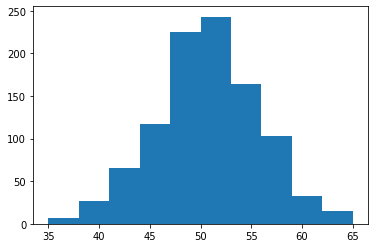

In [7]:
# Making an empty list called count into which the number of times heads wins out of 100 is added(finishes with 1000 numbers)
count = []
# the code is run 1000 times
for i in range(1000):
    x = rng.binomial(1, 0.5, 100)  #rng.binomial used to output 0 or 1 100 times. 0.5 is the probability of either number appearing
    y = np.count_nonzero(x ==1)  #np.count_nonzero is used to count number of appearance of non-zero integers in a numpy array
                                  # using x==1 gets it to count the number of 1s that appear which i have assigned to represent heads
    count.append(y)      # this adds the number representing the amount of times heads appears in 100 flips      
#print(count)
plt.hist(count)      #creates a histogram of the 1000 integers which each represent the number of times heads appears in 100 coin flips
plt.show()

[3]. Random Generator, NumPy v1.19 Manual; https://numpy.org/doc/stable/reference/random/generator.html